# <ins>Tutorial 4.1: Multi-Dimensional Arrays & FITS Files</ins>
*ASTR 211: Observational Astronomy, Spring 2021* \
*Written by Mason V. Tea*

In [115]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

Now that you've gotten a handle on the ropes with Python, it's time to start doing some practical astronomy with it. In this tutorial, we'll go over the basics of multi-dimensional arrays in Python and discuss how they're used in astrophysics. In the next, we'll talk about how we get images of this format ready for science (and/or prettification).

## Higher-dimensional arrays

_A quick reminder that, for most intents and purposes,_ arrays are lists and lists are arrays. _The only major difference in Python is that arrays can have math performed on all their elements at once, while lists require some more thought to edit (i.e. for-loops). I'll be using the words "list" and "array" interchangably, so keep this in mind._

The easiest way to imagine higher-dimensional arrays is as a matrix of _shape_ (N,M), meaning it contains N rows and M columns, where all rows are the same length & the same is true of the columns. In Python, these "matricies" are built up using lists of lists, where N is the number of lists contained within the main one, and M is the length of those lists.

The normal arrays we've been using up to this point are "zero-dimensional" arrays; in other words, they have shape (0,N). This means that it's just a list, and contains no lists itself. (You can check the shape of any `numpy` array using `<list>.shape` _or_ `np.shape(<list>)`.)

In [25]:
arr = np.array([0,1,2,3,4])
print(arr.shape)               # Shape (0,5); 0 rows, 5 "columns"

(5,)


If the array is a list of lists, however, we bump up in dimension. If we place the list above inside a list itself, the array should have dimension (1,5), as `numpy` will now register the list as a "row" in the overall array.

In [65]:
arr = np.array([[0,1,2,3,4]])  # Notice the extra brackets
print(arr.shape)               # Shape (1,5); 1 row, 5 "columns"

(1, 5)


If we were to add four more rows to the example above, we would have an array of shape (5,5), essentially a 5x5 square matrix. We can accomplish this a few different ways, but the most straightforward (I think) is `numpy`'s own `append` command (which is a bit different from Python's native one, as you'll see). 

In [102]:
arr = np.array([[0,1,2,3,4]])

idx = 0
new_vals = np.arange(5,25)         # Array of integers from 5 to 25

for x in range(4):                               # Number of new rows
    new_row = new_vals[idx:idx+5]                # Slice containing five values
    arr = np.append(arr, [new_row], axis=0)      # Append [newrow] to arr on 0th axis
    idx += 5                                     # Change starting index for next slice
    
print(arr)

[[ 0  1  2  3  4]
 [ 5  6  7  8  9]
 [10 11 12 13 14]
 [15 16 17 18 19]
 [20 21 22 23 24]]


As you can see, it takes a little elbow grease. There are a few things to note here. 

1. **Each new row is the same length as the last**, of course.


2. **The list you're appending needs to have outer brackets**, just like the original.


3. **The `numpy` append function requires you to tell it which "axis" you want**, which in most cases will be 0. If you were to give it an axis of 1, you would end up getting a long list of shape (0,25) in return.

Just like any other `numpy` array, you can do math on the entire thing at once. For example, let's add 1 to each of these values.

In [103]:
arr += 1
print(arr)

[[ 1  2  3  4  5]
 [ 6  7  8  9 10]
 [11 12 13 14 15]
 [16 17 18 19 20]
 [21 22 23 24 25]]


Something I've neglected to mention thus far are _list functions,_ which let you perform mat _with_ a whole array at once, rather than _on_ it. Some examples are `sum`, `median`, `mode`, etc.

In [107]:
print(np.median(arr))   # Average value in arr
print(np.sum(arr))      # Sum of values in arr (1+2+...+25)

13.0
325


In order to access any single value in one of these arrays, you can index it similarly to the way you would a matrix, the only difference being that the upper left "coordinate" will be (0,0) instead of (1,1) and the lower right coordinate will be (N-1,M-1) rather than (N,M). In Python, indexing multiple-dimensional arrays is the same as the ones we've seen so far, just with an extra index: one for each "coordinate" (N,M).

In [111]:
print(arr[0][0]) # Should be 1
arr[0][0] = 100  # Replace 1 at (0,0) with 100 in array

print(arr[4][4]) # Should be 25
arr[4][4] = 2500  # Replace 1 at (0,0) with 2500 in array

print(arr)

100
25
[[ 100    2    3    4    5]
 [   6    7    8    9   10]
 [  11   12   13   14   15]
 [  16   17   18   19   20]
 [  21   22   23   24 2500]]


You've actually seen some multi-dimensional arrays in previous tutorials. The asymmetric errorbars from Tutorial 3.1, for example, is an array of shape (2,M), as it has 2 columns and 1 row. 

In [114]:
d_asym = np.array([np.arange(0,20), np.arange(0,20)])
print(d_asym.shape)

(2, 20)


Similarly, the `pandas` dataframes we used to load CSVs in Tutorial 3.2 are arrays of shape (N,M), where N is the number of columns (`data['colA']`) and M is the number of rows.

## Images as arrays

Images are also higher-dimensional arrays. For example, if the resolution of your computer screen is 1920x1080, this means that the image it displays is an array of pixels of shape (1920,1080), where each pixel "value" depends on the amount of green, red, blue, and its brightness relative to other pixels.

CCDs are also basically just an array of pixels, each one a "light bucket". This means that, rather than having color values associated with them, each of these CCD pixels simply counts the number of photons that hits it and reports that number back, relying a series of filters to distinguish between "colors" (really bandpasses). So, **CCD images are just arrays containing brightness values for each pixel**, the dimensions of which depend on the size of the CCD. (Some telescopes, like the _Chandra_ X-ray Observatory, also record color instead of using filters, but we'll only be talking about the optical.)

## FITS Files

FITS files (**F**lexible **I**mage **T**ransport **S**ystem; often `<filename>.fits` or `<filename>.fit`) are the astronomical "data bucket" of choice, and are mostly used to store arrays representing such images. They can store data types other than images -- really, there's nothing stopping them from holding any kind of array -- but we'll be focusing on how to use them for astronomical imaging.

Many image processing programs don't recognize FITS files, and often the best way to mess with them (in my experience) is with a custom program. If they're such a pain, why don't we just use normal image formats, like PNG or JPEG? It's because the alternatives are _compressed,_ meaning that we lose information on each pixel in order to make the file smaller. FITS files are uncompressed, meaning that each pixel retains the value it had when it was created. This results in a much larger and more processing-heavy file, but all data is preserved.

There are a few ways to mess with FITS files.

1. Write a custom Python script (preferred method for processing calibration images).


2. Use an image program specifially meant for astronomical images like DS9, MaximDL (on the 24" PC) or AstroImageJ (which I'm told you'll learn to use in class next week).


3. Use Photoshop (expensive) or GIMP.net (free), which recognize FITS files; however, **these are only for viewing/cosmetic adjustments, _not_ science-ready image processing.**


All other relevant programs from above are discussed in detail in the handouts on the course website, so we'll focus on custom code in this notebook. Before we go digging around in the internals, let's figure out how to look at the data in a fits file as an image.

### Opening/showing images

I've saved a few science images in different filters of the Whirlpool galaxy I took a few nights ago in a folder in this directory called `science`, so I'll open the V filter file with `imshow` below. Luckily, you've seen a similar process before: it's just like plotting with `matplotlib`, except we use the `imshow` (image show) function instead of `plot`, `scatter`, etc. 

Like any other plotting function, `imshow` takes arrays as arguments; in this case, just one, which is our multi-dimentional array in the FITS file. In order to extract this array, we need some tools from a new library called `astropy`. Specifically, we'll be using the `open` function from `astropy.io.fits` to, well, open the FITS file.

In [127]:
from astropy.io import fits

wpg = fits.open('science/Autosave Image -0001WPG_V_300s.fit')
print(wpg)

As you can see, what results is an `asstropy` HDU object, which just holds all the information about the FITS file. The data itself is located in the 0th index of this object, and we can use the `.data` method to get it as an arrray that we can use.

In [129]:
image = wpg[0].data
print(image)

[[7901 7951 8329 ... 8056 8383 8149]
 [8157 7998 8053 ... 8201 8224 7866]
 [8209 8234 8367 ... 8210 8129 7876]
 ...
 [8074 8123 8241 ... 8268 8210 8872]
 [8070 8050 8064 ... 8524 8729 8409]
 [8086 8154 8277 ... 8495 8453 8417]]


Now we have the N-dimensional array. This is exactly what we want to give to `imshow`.

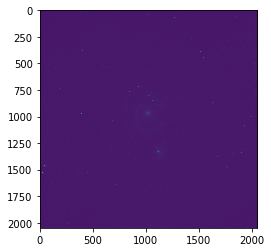

In [131]:
plt.imshow(image)
plt.show()

There you have it, the Whirlpool galaxy in some of its glory; if you look closely, you can see some spiral arm structure! However, this is the raw image from the telescope, so there's much we can do to improve it (which we'll get to in the image processing section). Now, if I had forgotten to put the exposure time and filter in the file title, how would I be able to contextualize what I'm looking at? Luckily, all this information is often stored in the FITS header, as is the case for our 24".

To view what's in our header, we just need to use the `.header` method on our open FITS file rather than `.data`. It's that easy.

In [135]:
head = wpg[0].header
print(head)

SIMPLE  =                    T                                                  BITPIX  =                   16 /8 unsigned int, 16 & 32 int, -32 & -64 real     NAXIS   =                    2 /number of axes                                  NAXIS1  =                 2048 /fastest changing axis                           NAXIS2  =                 2048 /next to fastest changing axis                   BSCALE  =   1.0000000000000000 /physical = BZERO + BSCALE*array_value           BZERO   =   32768.000000000000 /physical = BZERO + BSCALE*array_value           DATE-OBS= '2021-03-08T01:37:49.88' /YYYY-MM-DDThh:mm:ss observation, UT         EXPTIME =   300.00000000000000 /Exposure time in seconds                        EXPOSURE=   300.00000000000000 /Exposure time in seconds                        SET-TEMP=  -20.000000000000000 /CCD temperature setpoint in C                   CCD-TEMP=  -20.000000000000000 /CCD temperature at start of exposure in C       XPIXSZ  =   13.500000000000000 /Pixel Wi

As you can see, it's a bit  of a mess, but it's got a bunch of useful stuff in it. All of the all-caps words are basically "columns" in an object similar to a `pandas` dataframe. To get their value, you reference them in a similar fashion. Let's use this to get the filter, exposure time, and CCD temperature for this image.

In [137]:
print(head['FILTER'])
print(head['EXPOSURE'])
print(head['CCD-TEMP'])

V
300.0
-20.0


### Image processing

As you've covered in class, taking a science-quality image with the telescope requires a series of calibration images as well: _biases, darks, and flats._ We'll go over these in lecture, and build up an image processing pipeline that I'll upload separately from this notebook once we've written it together.